In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *


# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
yf.pdr_override()

In [2]:
from itertools import combinations
c = (1,2,3,4,5,6,7,8,9,10,11,12) 
i=0
result=[]
while i<len(c):
    for j in combinations(c,i):
        #print(list(j))
        result.append(list(j))
    i+=1 
print(len(result))

4095


In [3]:
start="2020-12-31"
end="2023-09-30"
name="AAPL"

#MACD619RSI21_8020
stock_data=pct_change(name,start,end)
stock_data=stock_data.copy()

#指标运算
stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)
stock_data= my_rsi(stock_data, 21)

#y值
stock_data["y"]=np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)


# del stock_data["real_situation"]
# del stock_data["Volume"]
# del stock_data["RSI6"]
# del stock_data["RSI14"]
# del stock_data["re_close"]
# del stock_data["re_open"]
# del stock_data["Low"]
# del stock_data["log_return"] 
# del stock_data["up_or_down"]
# del stock_data["Close_price_percentage"]
# del stock_data["MACD"]
# del stock_data["DIF"]
# del stock_data["Position"]

stock_data = stock_data.dropna()


print(stock_data)

y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)






                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-03  135.759995  135.770004  133.610001  133.940002  131.788940   
2021-02-04  136.300003  137.399994  134.589996  137.389999  135.183533   
2021-02-05  137.350006  137.419998  135.860001  136.759995  134.764725   
2021-02-08  136.029999  136.960007  134.919998  136.910004  134.912506   
2021-02-09  136.619995  137.880005  135.850006  136.009995  134.025681   
...                ...         ...         ...         ...         ...   
2023-09-25  174.199997  176.970001  174.149994  176.080002  176.080002   
2023-09-26  174.820007  175.199997  171.660004  171.960007  171.960007   
2023-09-27  172.619995  173.039993  169.050003  170.429993  170.429993   
2023-09-28  169.339996  172.029999  167.619995  170.690002  170.690002   
2023-09-29  172.020004  173.070007  170.339996  171.210007  171.210007   

              Volume  Close_price_per

In [4]:
stock_data = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21", "up_or_down","y"]]
stock_data.head()

print(stock_data.iloc[:, [0,1]])

            re_close   re_open
Date                          
2021-02-03  0.152778  0.995366
2021-02-04  0.996443  0.608544
2021-02-05  0.576920  0.955133
2021-02-08  0.975489  0.544116
2021-02-09  0.078812  0.379305
...              ...       ...
2023-09-25  0.684398  0.017732
2023-09-26  0.084747  0.892658
2023-09-27  0.345863  0.894737
2023-09-28  0.696146  0.390023
2023-09-29  0.318684  0.615385

[669 rows x 2 columns]


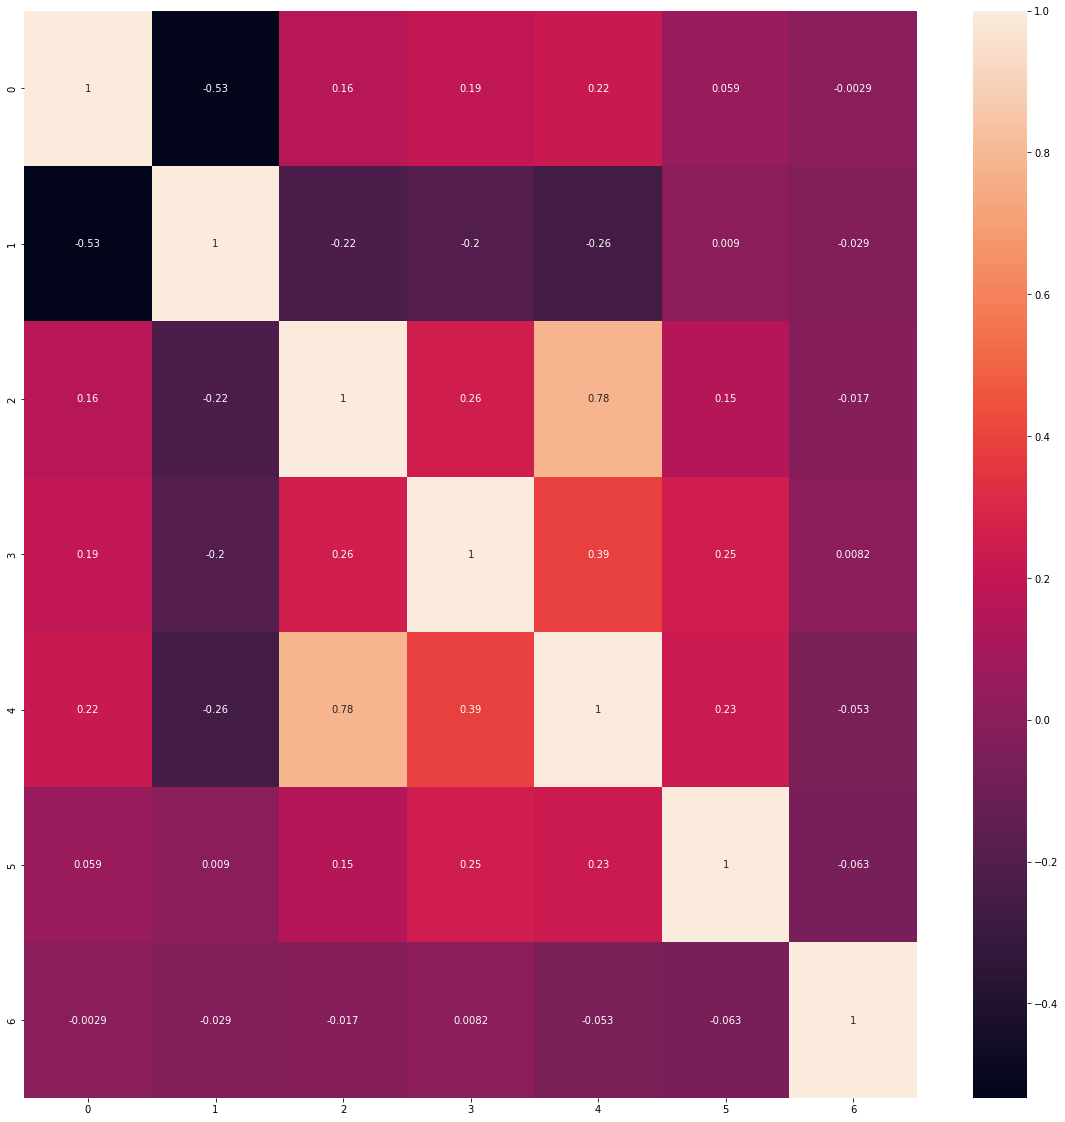

In [5]:

cor = np.corrcoef(stock_data.T)
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
del stock_data["y"]
num_columns = stock_data.shape[1]+1
print(num_columns)

7


In [7]:
for i in range(1,num_columns):
    #standardScaler
    X = stock_data.iloc[:,:i]
    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.005

    #logistic regression
    model = LogisticRegression(penalty =penalty, C=C) 
    #logistic regression
    #model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    

    
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

1 :  model_score:  0.5373134328358209  f1_score:  0.6990291262135923  accuary_score:  0.5373134328358209
2 :  model_score:  0.5970149253731343  f1_score:  0.7011070110701108  accuary_score:  0.5970149253731343
3 :  model_score:  0.5472636815920398  f1_score:  0.6666666666666666  accuary_score:  0.5472636815920398
4 :  model_score:  0.5323383084577115  f1_score:  0.6328124999999999  accuary_score:  0.5323383084577115
5 :  model_score:  0.5124378109452736  f1_score:  0.5242718446601942  accuary_score:  0.5124378109452736
6 :  model_score:  0.5422885572139303  f1_score:  0.5257731958762887  accuary_score:  0.5422885572139303


In [8]:


for i in range(1,num_columns):
    #normalization MinMaxScalar
    X = stock_data.iloc[:,:i]
    st_x= MinMaxScaler()   
    X= st_x.fit_transform(X)  
    
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    #logistic regression
    model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

1 :  model_score:  0.5422885572139303  f1_score:  0.6714285714285714  accuary_score:  0.5422885572139303
2 :  model_score:  0.5174129353233831  f1_score:  0.5800865800865801  accuary_score:  0.5174129353233831
3 :  model_score:  0.5174129353233831  f1_score:  0.5800865800865801  accuary_score:  0.5174129353233831
4 :  model_score:  0.5024875621890548  f1_score:  0.5495495495495495  accuary_score:  0.5024875621890548
5 :  model_score:  0.4925373134328358  f1_score:  0.4742268041237113  accuary_score:  0.4925373134328358
6 :  model_score:  0.5323383084577115  f1_score:  0.49462365591397855  accuary_score:  0.5323383084577115


In [9]:
#standardScaler
X = stock_data.iloc[:,:num_columns]
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.5323383084577115  f1_score:  0.5436893203883496  accuary_score:  0.5323383084577115


In [10]:
#normalization MinMaxScalar
X = stock_data.iloc[:,:num_columns]
st_x= MinMaxScaler()   
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.5323383084577115  f1_score:  0.5480769230769231  accuary_score:  0.5323383084577115


[-0.02356736 -0.06200678  0.26592118  0.11853029 -0.38273746 -0.08242484]
Score:0 -0.02357
Score:1 -0.06201
Score:2 0.26592
Score:3 0.11853
Score:4 -0.38274
Score:5 -0.08242


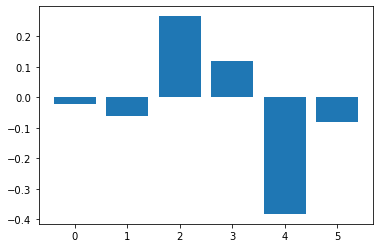

model_score:  0.5174129353233831  f1_score:  0.4812834224598931  accuary_score:  0.5174129353233831


In [11]:
X = stock_data.iloc[:,:num_columns]
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
# # 设置正则化类型（L1, L2, Elastic Net）
# penalty = 'l2' 

# # 设置正则化强度（C）
# C = 0.005

# #logistic regression
# model = LogisticRegression(penalty =penalty, C=C) 

#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
    
# get importance
importance = model.coef_[0]
print(importance)
# summarize feature importance
count=0
for i in importance:
    print('Score:%.d %.5f' % (count,i))
    count+=1
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)

plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), range(len(importance)))
plt.show()
    
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))